### Implementing simple neural network from scratch
In this notebook I implemented a simple neural network without using advanced ML libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from common import *
import pickle

In [2]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_pass(self, input):
        raise NotImplementedError

    def backpropagation(self, output_error, learning_rate):
        raise NotImplementedError


class FullyConnectedLayer(Layer):
    def __init__(self, input_size, output_size, init_method="random"):
        if init_method == "random":
            self.weights = np.random.rand(input_size, output_size) - 0.5
            self.bias = np.random.rand(1, output_size) - 0.5
        elif init_method == "zeros":
            self.weights = np.zeros((input_size, output_size))
            self.bias = np.zeros((1, output_size))
        elif init_method == "xavier":
            self.weights = np.random.randn(input_size, output_size) * np.sqrt(
                2 / (input_size + output_size)
            )
            self.bias = np.random.randn(1, output_size) * np.sqrt(
                2 / (input_size + output_size)
            )
        elif init_method == "he":
            self.weights = np.random.randn(input_size, output_size) * np.sqrt(
                2 / input_size
            )
            self.bias = np.random.randn(1, output_size) * np.sqrt(2 / input_size)

    def forward_pass(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backpropagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error


class ActivationComponent(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_pass(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backpropagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error


class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.convergence = []

    def save(self, filename):
        with open(filename, "wb") as f:
            pickle.dump(self, f)

    def add(self, layer):
        self.layers.append(layer)

    def set_loss(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        samples = len(input_data)
        result = []
        for i in range(samples):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_pass(output)
            result.append(output)

        return result

    def fit(self, x_train, y_train, epochs, learning_rate, printc=False):
        samples = len(x_train)
        for i in range(epochs):
            err = 0
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_pass(output)
                err += self.loss(y_train[j], output)

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backpropagation(error, learning_rate)

            err /= samples
            self.convergence.append(err)
            if printc:
                print(f"Epoch: {i}, Error: {err}")

In [3]:
# load mnist data
x_train, y_train = load_mnist("mnist", kind="train")
x_test, y_test = load_mnist("mnist", kind="t10k")

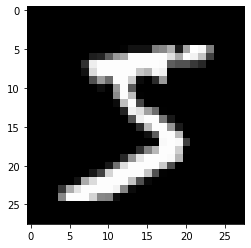

In [4]:
# display an image from the training set
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.show()

In [5]:
mnist_net = Network()
mnist_net.add(FullyConnectedLayer(784, 100, "xavier"))
mnist_net.add(ActivationComponent(sigmoid, sigmoid_prime))
mnist_net.add(FullyConnectedLayer(100, 10, "xavier"))
mnist_net.add(ActivationComponent(sigmoid, sigmoid_prime))
mnist_net.set_loss(cross_entropy, cross_entropy_prime)
mnist_net.fit(x_train, y_train, epochs=10, learning_rate=0.01, printc=True)

#save the model
mnist_net.save("mnist_net.pkl")

/home/michal/neural-network-from-scratch/common.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 0, Error: 0.005329893531478389


KeyboardInterrupt: 